In [1]:
import numpy as np
import librosa
import cv2
import os
import tensorflow as tf

In [2]:
# Paths to the RAVDESS dataset folders
audio_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO"
video_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO"

In [3]:
# Function to list files in a directory
def list_files(directory):
    files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    return files_list

In [4]:
# List audio files
audio_files = list_files(audio_dir)
print("Audio Files:")
for audio_file in audio_files:
    print(audio_file)

Audio Files:
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-02-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-02-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-01-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-01-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-02-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-01-02-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-02-01-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-02-01-02-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-02-02-02-01-01.wav
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-0

In [5]:
# List video files
video_files = list_files(video_dir)
print("\nVideo Files:")
for video_file in video_files:
    print(video_file)


Video Files:
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-01-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-01-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-02-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-01-01-02-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-01-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-01-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-02-01-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-01-02-02-01.mp4
C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO\Video_Speech_Actor_01\Actor_01\01-01-02-02-01-01-01.mp4
C:\Users\1201101209\Desktop\RAVD

In [6]:
# Ensure audio and video files are sorted in the same order
audio_files.sort()
video_files.sort()

In [7]:
print("Total number of audio files:", len(audio_files))
print("Total number of video files:", len(video_files))

Total number of audio files: 1440
Total number of video files: 1440


In [8]:
import os
import pandas as pd

# Paths to the RAVDESS dataset folders
audio_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO"
video_dir = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS VIDEO"

# Function to extract emotion label from file name
def extract_emotion_label(file_name):
    # Extract emotion label from file name
    emotion_code = int(file_name.split('-')[2])
    emotion_mapping = {
        1: 'neutral',
        2: 'calm',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fearful',
        7: 'disgusted',
        8: 'surprised'
    }
    return emotion_mapping.get(emotion_code, 'unknown')

# Function to extract actor ID from file name
def extract_actor_id(file_name):
    return file_name.split('-')[6]

# Function to label audio files with emotion labels and actor IDs
def label_audio_files(audio_file_paths):
    labeled_data = []
    for file_path in audio_file_paths:
        file_name = os.path.basename(file_path)
        emotion_label = extract_emotion_label(file_name)
        actor_id = extract_actor_id(file_name)
        labeled_data.append({'File': file_name, 'Emotion': emotion_label, 'Actor_ID': actor_id})
    return labeled_data

# Function to label video files with emotion labels and actor IDs
def label_video_files(video_file_paths):
    labeled_data = []
    for file_path in video_file_paths:
        file_name = os.path.basename(file_path)
        emotion_label = extract_emotion_label(file_name)
        actor_id = extract_actor_id(file_name)
        labeled_data.append({'File': file_name, 'Emotion': emotion_label, 'Actor_ID': actor_id})
    return labeled_data

# Function to list files in a directory
def list_files(directory):
    files_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    return files_list

# List audio files
audio_files = list_files(audio_dir)

# List video files
video_files = list_files(video_dir)

# Label the audio and video files
labeled_audio_data = label_audio_files(audio_files)
labeled_video_data = label_video_files(video_files)

# Convert labeled data to pandas DataFrame
audio_df = pd.DataFrame(labeled_audio_data)
video_df = pd.DataFrame(labeled_video_data)

# Display the labeled data in tabular form
print("Labeled Audio Files:")
print(audio_df)

print("\nLabeled Video Files:")
print(video_df)

Labeled Audio Files:
                          File    Emotion Actor_ID
0     03-01-01-01-01-01-01.wav    neutral   01.wav
1     03-01-01-01-01-02-01.wav    neutral   01.wav
2     03-01-01-01-02-01-01.wav    neutral   01.wav
3     03-01-01-01-02-02-01.wav    neutral   01.wav
4     03-01-02-01-01-01-01.wav       calm   01.wav
...                        ...        ...      ...
1435  03-01-08-01-02-02-24.wav  surprised   24.wav
1436  03-01-08-02-01-01-24.wav  surprised   24.wav
1437  03-01-08-02-01-02-24.wav  surprised   24.wav
1438  03-01-08-02-02-01-24.wav  surprised   24.wav
1439  03-01-08-02-02-02-24.wav  surprised   24.wav

[1440 rows x 3 columns]

Labeled Video Files:
                          File    Emotion Actor_ID
0     01-01-01-01-01-01-01.mp4    neutral   01.mp4
1     01-01-01-01-01-02-01.mp4    neutral   01.mp4
2     01-01-01-01-02-01-01.mp4    neutral   01.mp4
3     01-01-01-01-02-02-01.mp4    neutral   01.mp4
4     01-01-02-01-01-01-01.mp4       calm   01.mp4
...           

In [9]:
#Function to extract MFCC 
def extract_mfcc(audio_path, num_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)  # Load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)  # Extract MFCC
    return mfcc

In [10]:
# Preprocessing audio files
max_length = 1000  # Set the maximum length of MFCC features (adjust as needed)
audio_features = []

for audio_file in audio_files:
    mfcc = extract_mfcc(audio_file)
    # Pad or truncate the MFCC features to ensure they all have the same length
    if mfcc.shape[1] < max_length:
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, max_length - mfcc.shape[1])), mode='constant')
        audio_features.append(mfcc_padded)
    elif mfcc.shape[1] > max_length:
        mfcc_truncated = mfcc[:, :max_length]
        audio_features.append(mfcc_truncated)
    else:
        audio_features.append(mfcc)

In [11]:
# Convert the list of MFCC features to a numpy array
audio_features = np.array(audio_features)

In [12]:
# Reshape the audio_features to 2D for scaling (samples, features)
n_samples, n_mfcc, n_frames = audio_features.shape
audio_features_2d = audio_features.reshape(n_samples, -1)

In [13]:
from sklearn.preprocessing import StandardScaler
# Normalize the MFCC features
scaler = StandardScaler()
audio_features_normalized_2d = scaler.fit_transform(audio_features_2d)

# Reshape back to original shape (samples, n_mfcc, n_frames)
audio_features_normalized = audio_features_normalized_2d.reshape(n_samples, n_mfcc, n_frames)


In [14]:
print(audio_features_normalized.shape)

(1440, 13, 1000)


In [15]:
# Path to the audio file
audio_path = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-01-01.wav"
y, sr = librosa.load(audio_path, sr=None)

In [16]:
pip install --upgrade librosa matplotlib

Note: you may need to restart the kernel to use updated packages.


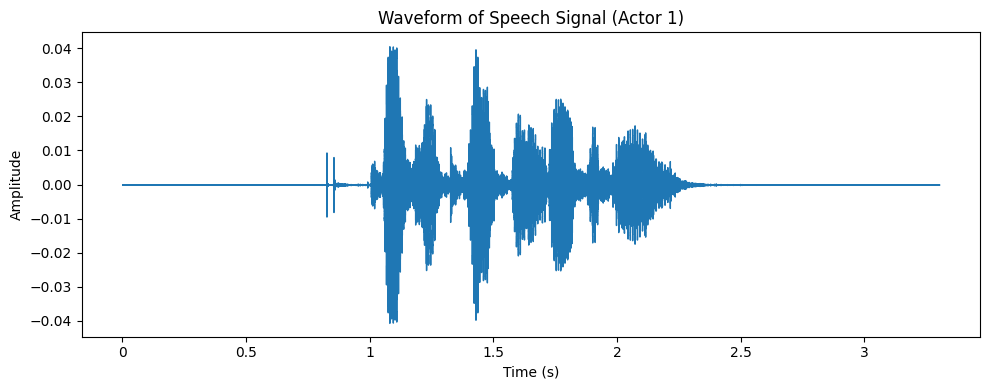

In [17]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Speech Signal (Actor 1)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_mfcc(audio_path, num_mfcc=13):
    y, sr = librosa.load(audio_path, sr=None)  # Load audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)  # Extract MFCC
    return mfcc, sr

# Path to the audio file
audio_path = r"C:\Users\1201101209\Desktop\RAVDESS\RAVDESS AUDIO\Actor_01\03-01-01-01-01-01-01.wav"

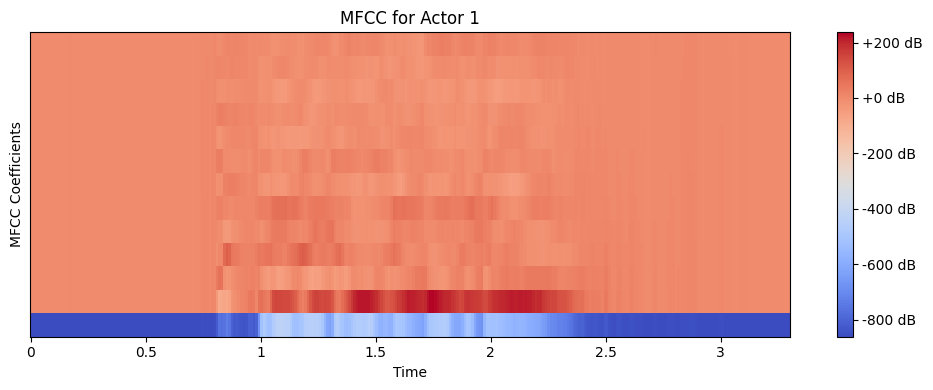

In [19]:
# Extract MFCC features
mfcc, sr = extract_mfcc(audio_path)

# Display the MFCC features
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC for Actor 1')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [20]:
import keras
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.applications.efficientnet import EfficientNetB0, preprocess_input

In [21]:
effnet_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

def extract_video_features(video_files, model, target_resolution=(224, 224), batch_size=32):
    video_features = []
    for i in range(0, len(video_files), batch_size):
        batch_video_files = video_files[i:i+batch_size]
        batch_videos = []
        for video_file in batch_video_files:
            cap = cv2.VideoCapture(video_file)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            features = []
            for _ in range(frame_count):
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, target_resolution)  # Resize frame to target resolution
                frame = preprocess_input(frame)  # Preprocess frame
                batch_videos.append(frame)
            cap.release()
        batch_videos = np.array(batch_videos)
        batch_features = model.predict(batch_videos)
        video_features.extend(batch_features)
    return video_features
effnet_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# Define the target resolution (e.g., 224x224)
target_resolution = (224, 224)

# Define batch size
batch_size = 32

# Extract video features using EffNet
video_features_effnet = extract_video_features(video_files, effnet_model, target_resolution, batch_size)


109/109 ━━━━━━━━━━━━━━━━━━━━ 75s 666ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 637ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 639ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 72s 646ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 75s 642ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 70s 640ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 70s 649ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 74s 640ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 69s 640ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 74s 644ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 74s 640ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 70s 640ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 72s 639ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 70s 640ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 73s 642ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 68s 644ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 68s 650ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 73s 647ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 70s 640ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 69s 643ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 67s 639ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 72s 640ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 67s

In [22]:
# Convert the video features to a numpy array
video_features = np.array(video_features_effnet)

In [23]:
#Ensure that the video features array has the correct shape
print("Shape of video features:", video_features.shape)
print("Shape of audio features:", audio_features.shape)

Shape of video features: (159222, 1280)
Shape of audio features: (1440, 13, 1000)


In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert list of video features to numpy array
video_features_np = np.array(video_features_effnet)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape the features to fit the scaler's input shape
video_features_reshaped = video_features_np.reshape(-1, 1280)

# Normalize the features
normalized_video_features = scaler.fit_transform(video_features_reshaped)

# Reshape the normalized features back to the original shape
normalized_video_features = normalized_video_features.reshape(video_features_np.shape)

#Print shape of normalized features
print("Shape of normalized video features:", normalized_video_features.shape)

Shape of normalized video features: (159222, 1280)


In [25]:
print("Shape of normalized audio features", audio_features_normalized.shape)
print("Shape of normalized video features:", normalized_video_features.shape)

Shape of normalized audio features (1440, 13, 1000)
Shape of normalized video features: (159222, 1280)


In [26]:
# Truncate or pad the audio features to ensure the number of samples match
num_samples = min(audio_features_normalized.shape[0], normalized_video_features.shape[0])
audio_features_normalized = audio_features_normalized[:num_samples]
normalized_video_features = normalized_video_features[:num_samples]

# Flatten the audio features to match the dimension for concatenation
audio_features_flat = audio_features_normalized.reshape(num_samples, -1)

# Concatenate the audio and video features
combined_features = np.concatenate((audio_features_flat, normalized_video_features), axis=1)
print("Shape of combined features:", combined_features.shape)

Shape of combined features: (1440, 14280)


In [161]:
# Reshape for CNN input (batch_size, height, width, channels)
combined_features_reshaped = combined_features.reshape((num_samples, 1, combined_features.shape[1], 1))
print("Shape of reshaped combined features:", combined_features_reshaped.shape)

# Define input shape for the CNN
input_shape = (1, combined_features.shape[1], 1)

Shape of reshaped combined features: (1440, 1, 14280, 1)


In [162]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

emotion_mapping = {
    'neutral': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4, 
    'fearful': 5, 'disgusted': 6, 'surprised': 7
}

labels = [emotion_mapping[emotion] for emotion in audio_df['Emotion'][:num_samples]]
labels = to_categorical(labels, num_classes=8)
X_train, X_val, y_train, y_val = train_test_split(combined_features_reshaped, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (1152, 1, 14280, 1) (1152, 8)
Validation set shape: (288, 1, 14280, 1) (288, 8)


2D CNN

In [163]:
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(1, 3), activation='relu', input_shape=input_shape, padding='same'),
        Conv2D(32, kernel_size=(1, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(1, 2)),
        Conv2D(64, kernel_size=(1, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(1, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(1, 2)),
        Conv2D(128, kernel_size=(1, 3), activation='relu', padding='same'),
        Conv2D(128, kernel_size=(1, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(1, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')  # Assuming 8 emotion classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [164]:
input_shape = X_train.shape[1:]  # Get the input shape
model = create_cnn_model(input_shape)
model.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_307 (Conv2D)             │ (None, 1, 14280, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_308 (Conv2D)             │ (None, 1, 14280, 32)   │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_171               │ (None, 1, 7140, 32)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_309 (Conv2D)             │ (None, 1, 7140, 64)    │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_310 (Conv2D)             │ (None, 1, 7140, 64)    │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_172               │ (None, 1, 3570, 64)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_311 (Conv2D)             │ (None, 1, 3570, 128)   │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_312 (Conv2D)             │ (None, 1, 3570, 128)   │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_173               │ (None, 1, 1785, 128)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_57 (Flatten)            │ (None, 228480)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 256)            │    58,491,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_150 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,588,968 (223.50 MB)

 Trainable params: 58,588,968 (223.50 MB)

 Non-trainable params: 0 (0.00 B)

In [166]:
from keras.callbacks import EarlyStopping

input_shape = X_train.shape[1:]  # Get the input shape
model = create_cnn_model(input_shape)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.1585 - loss: 2.2378 - val_accuracy: 0.4583 - val_loss: 1.5623
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4557 - loss: 1.5444 - val_accuracy: 0.5174 - val_loss: 1.3158
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5657 - loss: 1.2307 - val_accuracy: 0.5729 - val_loss: 1.2121
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6828 - loss: 0.8920 - val_accuracy: 0.5521 - val_loss: 1.2576
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8015 - loss: 0.6439 - val_accuracy: 0.6354 - val_loss: 1.2233
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8711 - loss: 0.3505 - val_accuracy: 0.6042 - val_loss: 1.3789
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9052 - loss: 0.3137 - val_accuracy: 0.6042 - val_loss: 1.3308
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9350 - loss: 0.2081 - val_accuracy: 0.6181 - v

36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9989 - loss: 0.0088 - val_accuracy: 0.6007 - val_loss: 3.0505
Epoch 52/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9894 - loss: 0.0377 - val_accuracy: 0.5729 - val_loss: 2.5653
Epoch 53/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9954 - loss: 0.0247 - val_accuracy: 0.5729 - val_loss: 2.4418
Epoch 54/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9857 - loss: 0.0564 - val_accuracy: 0.5799 - val_loss: 2.3233
Epoch 55/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9919 - loss: 0.0230 - val_accuracy: 0.5833 - val_loss: 2.7549
Epoch 56/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9856 - loss: 0.0295 - val_accuracy: 0.5868 - val_loss: 2.5800
Epoch 57/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9927 - loss: 0.0211 - val_accuracy: 0.5486 - val_loss: 2.8868
Epoch 58/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9905 - loss: 0.0230 - val_accuracy: 0.5625 - val_lo

In [167]:
from sklearn.metrics import classification_report

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Reshape predictions and true labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Generate classification report
report = classification_report(y_val_classes, y_pred_classes)
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step
              precision    recall  f1-score   support

           0       0.21      0.30      0.25        20
           1       0.55      0.77      0.64        44
           2       0.44      0.35      0.39        34
           3       0.46      0.31      0.37        39
           4       0.64      0.71      0.67        42
           5       0.53      0.50      0.52        32
           6       0.52      0.53      0.52        32
           7       0.66      0.51      0.57        45

    accuracy                           0.52       288
   macro avg       0.50      0.50      0.49       288
weighted avg       0.53      0.52      0.52       288



In [36]:
# Define the number of folds
num_folds = 10

# Create KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect results
fold_no = 1
accuracies = []
losses = []

for train_index, val_index in kf.split(combined_features_reshaped):
    print(f"Training fold {fold_no}...")

    # Split the data
    X_train, X_val = combined_features_reshaped[train_index], combined_features_reshaped[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Reshape the input data to match the input shape required by the model
    input_shape = X_train.shape[1:]  # Get the input shape

    # Create the model
    model = create_cnn_model(input_shape)

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f"Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%")

    # Save accuracy and loss for this fold
    accuracies.append(scores[1] * 100)
    losses.append(scores[0])

    fold_no += 1

Training fold 1...
Score for fold 1: compile_metrics of 68.75%
Training fold 2...
Score for fold 2: compile_metrics of 58.33333134651184%
Training fold 3...
Score for fold 3: compile_metrics of 64.58333134651184%
Training fold 4...
Score for fold 4: compile_metrics of 63.19444179534912%
Training fold 5...
Score for fold 5: compile_metrics of 64.58333134651184%
Training fold 6...
Score for fold 6: compile_metrics of 69.44444179534912%
Training fold 7...
Score for fold 7: compile_metrics of 70.83333134651184%
Training fold 8...
Score for fold 8: compile_metrics of 59.02777910232544%
Training fold 9...
Score for fold 9: compile_metrics of 68.05555820465088%
Training fold 10...
Score for fold 10: compile_metrics of 58.33333134651184%


In [37]:
# Calculate average accuracy and loss
print(f"Average accuracy: {np.mean(accuracies)}%")
print(f"Average loss: {np.mean(losses)}")

Average accuracy: 64.51388776302338%
Average loss: 1.6444599688053132


AlexNet

In [168]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import KFold
import numpy as np

In [169]:
emotion_mapping = {
    'neutral': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4, 
    'fearful': 5, 'disgusted': 6, 'surprised': 7
}
labels = [emotion_mapping[emotion] for emotion in audio_df['Emotion'][:num_samples]]
labels = to_categorical(labels, num_classes=8)

In [170]:
# Reshape to (119, 120, 1)
new_shape = (119, 120, 1)
X_train_reshaped = X_train.reshape(-1, *new_shape)
X_val_reshaped = X_val.reshape(-1, *new_shape)

In [171]:
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(1152, 119, 120, 1)
(288, 119, 120, 1)


In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [173]:
def create_alexnet(input_shape):
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')  # Assuming 8 emotion classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [174]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

In [175]:
# Reshape to (119, 120, 1)
new_shape = (119, 120, 1)
X_train_reshaped = X_train.reshape(-1, *new_shape)
X_val_reshaped = X_val.reshape(-1, *new_shape)

print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(1152, 119, 120, 1)
(288, 119, 120, 1)


In [176]:
# Define input shape
input_shape = new_shape

# Create the AlexNet model
alexnet_model = create_alexnet(input_shape)

C:\Users\1201101209\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [177]:
# Train the AlexNet model
alexnet_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_val_reshaped, y_val), verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 442ms/step - accuracy: 0.1257 - loss: 2.1704 - val_accuracy: 0.1285 - val_loss: 2.0711
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - accuracy: 0.1666 - loss: 2.0409 - val_accuracy: 0.1528 - val_loss: 2.0567
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 353ms/step - accuracy: 0.1482 - loss: 2.0227 - val_accuracy: 0.1111 - val_loss: 2.0702
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - accuracy: 0.1392 - loss: 2.0587 - val_accuracy: 0.1111 - val_loss: 2.0711
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 364ms/step - accuracy: 0.1417 - loss: 2.0570 - val_accuracy: 0.1111 - val_loss: 2.0675
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 362ms/step - accuracy: 0.1306 - loss: 2.0654 - val_accuracy: 0.1111 - val_loss: 2.0660
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 361ms/step - accuracy: 0.1344 - loss: 2.0618 - val_accuracy: 0.1181 - val_loss: 2.0674
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - accuracy: 0.1391 - loss: 2.0601 - val_accu

In [178]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Ensure combined_features is a NumPy array
combined_features = np.array(combined_features)
labels = np.array(labels)

# Reshape to (119, 120, 1)
new_shape = (119, 120, 1)
combined_features_reshaped = combined_features.reshape(-1, *new_shape)

In [93]:
# Define the number of folds
num_folds = 10

# Create KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare to collect results
fold_no = 1
accuracies = []
losses = []

for train_index, val_index in kf.split(combined_features_reshaped):
    print(f"Training fold {fold_no}...")

    # Split the data
    X_train, X_val = combined_features_reshaped[train_index], combined_features_reshaped[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Create the AlexNet model
    alexnet_model = create_alexnet(new_shape)

    # Train the AlexNet model
    history = alexnet_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the AlexNet model
    scores = alexnet_model.evaluate(X_val, y_val, verbose=0)
    print(f"Score for fold {fold_no}: {alexnet_model.metrics_names[1]} of {scores[1]*100}%")

    # Save accuracy and loss for this fold
    accuracies.append(scores[1] * 100)
    losses.append(scores[0])

    fold_no += 1

# Calculate average accuracy and loss
print(f"Average accuracy: {np.mean(accuracies)}%")
print(f"Average loss: {np.mean(losses)}")


Training fold 1...
Score for fold 1: compile_metrics of 38.88888955116272%
Training fold 2...
Score for fold 2: compile_metrics of 40.97222089767456%
Training fold 3...
Score for fold 3: compile_metrics of 11.80555522441864%
Training fold 4...
Score for fold 4: compile_metrics of 31.94444477558136%
Training fold 5...
Score for fold 5: compile_metrics of 38.88888955116272%
Training fold 6...
Score for fold 6: compile_metrics of 36.80555522441864%
Training fold 7...
Score for fold 7: compile_metrics of 43.75%
Training fold 8...
Score for fold 8: compile_metrics of 50.0%
Training fold 9...
Score for fold 9: compile_metrics of 31.94444477558136%
Training fold 10...
Score for fold 10: compile_metrics of 28.47222089767456%
Average accuracy: 35.347222089767456%
Average loss: 1.6308399200439454


In [179]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val_reshaped)

# Convert predictions and true labels from one-hot encoding to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Print the classification report
report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=emotion_mapping.keys())
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step
              precision    recall  f1-score   support

     neutral       0.21      0.30      0.25        20
        calm       0.53      0.70      0.61        44
       happy       0.43      0.44      0.43        34
         sad       0.38      0.28      0.32        39
       angry       0.65      0.71      0.68        42
     fearful       0.57      0.53      0.55        32
   disgusted       0.53      0.50      0.52        32
   surprised       0.72      0.51      0.60        45

    accuracy                           0.52       288
   macro avg       0.50      0.50      0.49       288
weighted avg       0.53      0.52      0.52       288



DENSE NET

In [180]:
# Reshape for CNN input (batch_size, height, width, channels)
combined_features_reshaped = combined_features.reshape((num_samples, 1, combined_features.shape[1], 1))
print("Shape of reshaped combined features:", combined_features_reshaped.shape)

# Define input shape for the CNN
input_shape = (1, combined_features.shape[1], 1)

Shape of reshaped combined features: (1440, 1, 14280, 1)


In [181]:
# Example reshape, ensure 14280 can be reshaped to 119 * 120.
combined_features_reshaped = combined_features.reshape(-1, 119, 120, 1)
# Convert single channel to 3 channels by replicating the same channel.
combined_features_rgb = np.repeat(combined_features_reshaped, 3, axis=-1)

In [182]:
# Convert labels to one-hot encoding
labels_categorical = to_categorical(labels, num_classes=8)

In [183]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

emotion_mapping = {
    'neutral': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4, 
    'fearful': 5, 'disgusted': 6, 'surprised': 7
}

labels = [emotion_mapping[emotion] for emotion in audio_df['Emotion'][:num_samples]]
labels = to_categorical(labels, num_classes=8)
X_train, X_val, y_train, y_val = train_test_split(combined_features_rgb, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (1152, 119, 120, 3) (1152, 8)
Validation set shape: (288, 119, 120, 3) (288, 8)


In [184]:
def create_densenet(input_shape):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(8, activation='softmax')(x)  # Assuming 8 emotion classes
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [185]:
# Create the DenseNet model
densenet_model = create_densenet((119, 120, 3))

# Train the DenseNet model
history = densenet_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 256s 4s/step - accuracy: 0.1702 - loss: 2.2184 - val_accuracy: 0.1597 - val_loss: 2.0870
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.5630 - loss: 1.4250 - val_accuracy: 0.1806 - val_loss: 2.0699
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8188 - loss: 0.9130 - val_accuracy: 0.2639 - val_loss: 2.0622
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9348 - loss: 0.4849 - val_accuracy: 0.3194 - val_loss: 2.0222
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.9727 - loss: 0.2137 - val_accuracy: 0.2986 - val_loss: 2.0987
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9965 - loss: 0.1004 - val_accuracy: 0.3229 - val_loss: 2.0417
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9936 - loss: 0.0633 - val_accuracy: 0.3403 - val_loss: 2.0598
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.9964 - loss: 0.0419 - val_accuracy: 0.3403 - v

In [186]:
from sklearn.metrics import classification_report
import numpy as np

# Make predictions on the validation set
y_val_pred = densenet_model.predict(X_val)

# Convert predictions and true labels from one-hot encoding to class labels
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Print the classification report
report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=emotion_mapping.keys())
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 953ms/step
              precision    recall  f1-score   support

     neutral       0.35      0.35      0.35        20
        calm       0.54      0.64      0.58        44
       happy       0.36      0.24      0.29        34
         sad       0.39      0.18      0.25        39
       angry       0.65      0.62      0.63        42
     fearful       0.34      0.44      0.38        32
   disgusted       0.44      0.50      0.47        32
   surprised       0.44      0.58      0.50        45

    accuracy                           0.46       288
   macro avg       0.44      0.44      0.43       288
weighted avg       0.45      0.46      0.45       288

